In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [5]:
data.shape

(205, 7)

# Correlation

<AxesSubplot:>

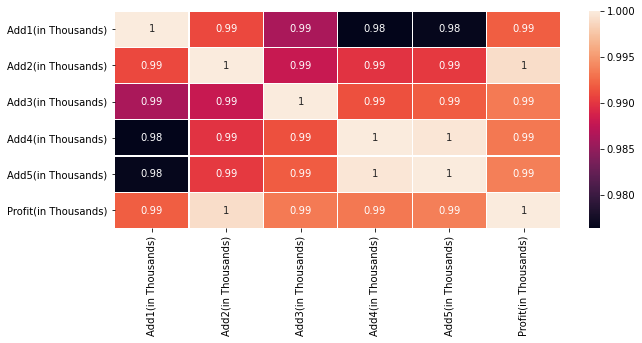

In [6]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,cmap='rocket',annot=True,linewidth=0.2)

In [7]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [8]:
y = data['Profit(in Thousands)']
X = data.drop(['Add2(in Thousands)','Profit(in Thousands)','Date'],axis=1)

In [9]:
X.shape

(205, 4)

# Regression Analysis

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [11]:
from sklearn import linear_model

In [12]:
lr = linear_model.LinearRegression()

In [13]:
model = lr.fit(X_train,y_train)

In [14]:
predictions = model.predict(X_test)

In [15]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64


In [16]:
print(predictions)

[4179.93209318 4424.40790401 5039.80229325 4927.44705957 5030.99090547
 4618.90335689 5381.65537409 5317.09820767 5205.09196869 5937.75644453
 5790.04374584 4989.98317456 5058.31625044 5801.39955022 4962.87768249
 5068.8532372  4215.41450094 5053.86620053 5030.55514027 5139.05867959
 5151.18810249 5411.60601011 4560.47392279 4610.12663317 4443.03225558
 4153.53865997 5593.01555992 5687.89134288 4657.41723116 5705.24976168
 4984.84908689 5198.9232693  5033.2926039  5529.65511594 5026.47346789
 5047.71244711 5114.05206109 4727.27200012 4597.83771824 4925.50763993
 5212.30094327]


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 518.7437045630363


In [19]:
from sklearn.metrics import r2_score

In [20]:
r_sq = r2_score(y_test,predictions)

In [21]:
r_sq

0.9973004095559889

R squared value is nearer to 1

In [24]:
from sklearn.linear_model import Lasso

In [25]:
ls = Lasso()

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
ls.fit(X_train,y_train)

Lasso()

In [29]:
y_pred_ls = ls.predict(X_test)

In [30]:
print('MSE is:',mean_squared_error(y_test,y_pred_ls))

MSE is: 513.9638740052067


In [31]:
 r2_score(y_test,y_pred_ls)

0.9973252842383887

# Predict the Profit

In [22]:
y_pred=lr.predict([[290,312,309,298]])

In [23]:
y_pred

array([5526.12797396])